<a href="https://colab.research.google.com/github/KARTHIK01122004/dv_task/blob/main/task8_dv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

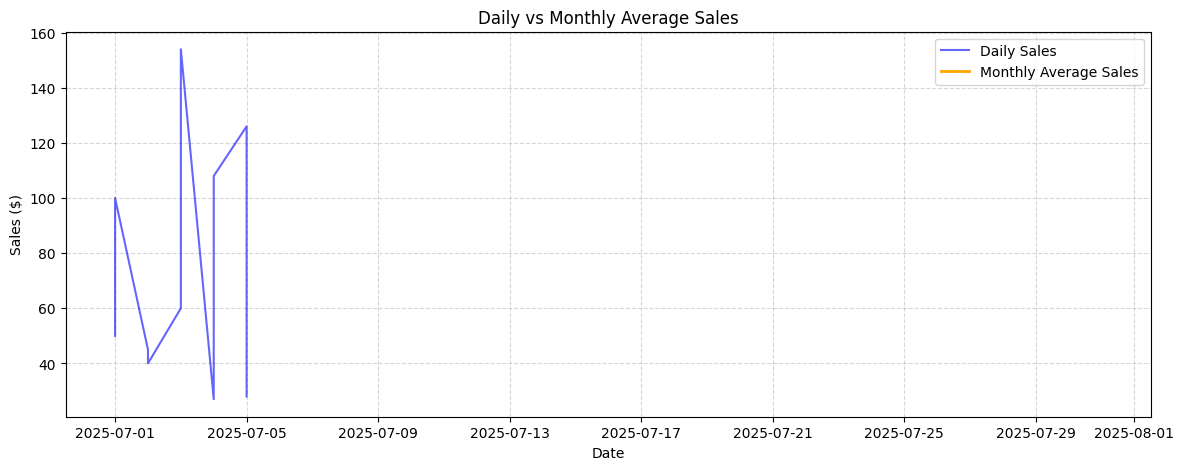

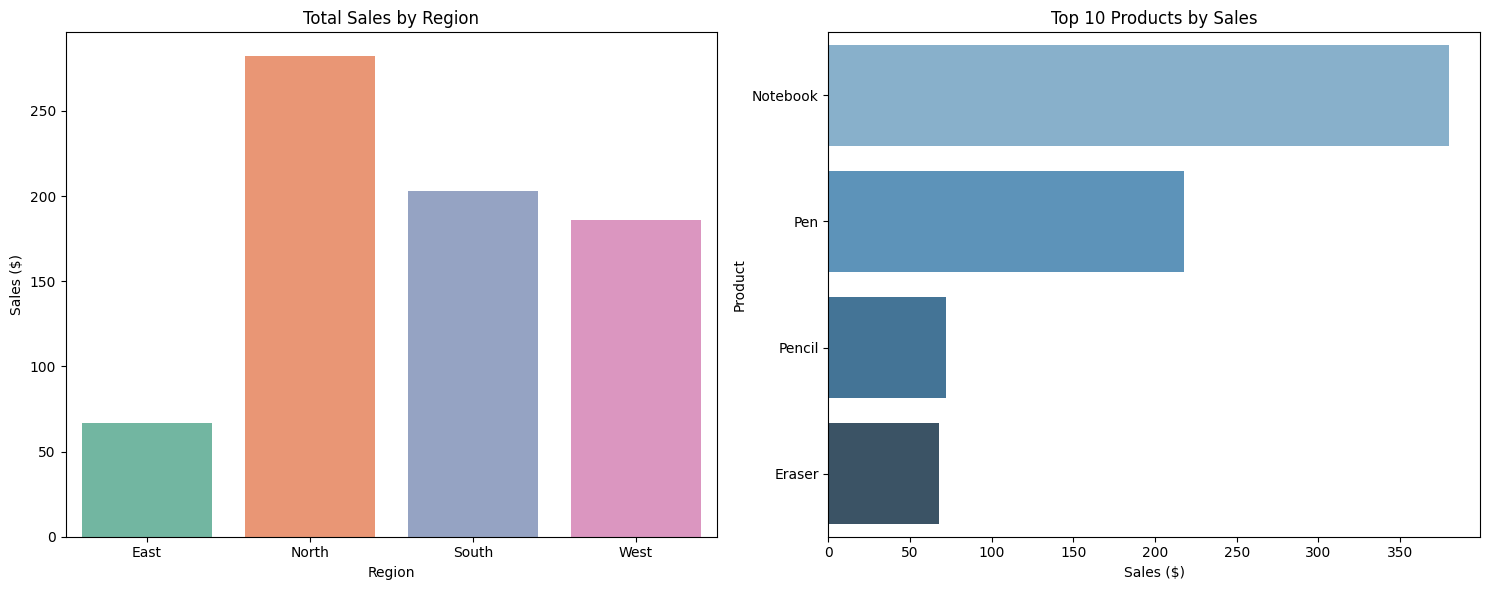

✅ Interactive map saved as 'Superstore-sales-map.html'


'\n🗺️ Geographical Map vs. Map Projection:\n- A **geographical map** represents the Earth’s surface based on coordinates (latitude, longitude).\n- A **map projection** converts the 3D Earth into a 2D surface.\n  Examples include:\n    • Mercator Projection (used by Folium by default) — preserves direction but distorts area.\n    • Robinson Projection — balanced visual representation.\n    • Albers Equal Area Projection — preserves area for regional analysis.\nFolium maps typically use the Web Mercator projection (EPSG:3857).\n'

In [ ]:
# ---------------------------------------------------------
# Task 8: Analyze and Visualize Spatial and Geospatial Data
# ---------------------------------------------------------

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings

warnings.filterwarnings('ignore')

# -----------------------------------------
# Load and Prepare the Dataset
# -----------------------------------------
df = pd.read_csv("sales_data_full.csv")

# Parse dates and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Compute total sales
df['Sales'] = df['Quantity'] * df['Price']

# -----------------------------------------
# Time Series Analysis: Daily & Monthly Sales
# -----------------------------------------
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Sales'], label='Daily Sales', color='blue', alpha=0.6)

monthly_sales = df['Sales'].resample('M').mean()
plt.plot(monthly_sales.index, monthly_sales, label='Monthly Average Sales', color='orange', linewidth=2)

plt.title('Daily vs Monthly Average Sales')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# -----------------------------------------
# Aggregate Sales by Region and Product
# -----------------------------------------
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
top_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

# -----------------------------------------
# Regional and Product Visualizations
# -----------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Region-wise total sales
sns.barplot(x='Region', y='Sales', data=region_sales, palette='Set2', ax=ax[0])
ax[0].set_title('Total Sales by Region')
ax[0].set_ylabel('Sales ($)')
ax[0].set_xlabel('Region')

# Top 10 products
sns.barplot(x='Sales', y='Product', data=top_sales, palette='Blues_d', ax=ax[1])
ax[1].set_title('Top 10 Products by Sales')
ax[1].set_xlabel('Sales ($)')
ax[1].set_ylabel('Product')

plt.tight_layout()
plt.show()

# -----------------------------------------
# Interactive Geospatial Visualization (Folium)
# -----------------------------------------
# Approximate coordinates for regions (replace with real values if available)
coords = {
    'South': (33.4484, -86.7828),   # Birmingham, AL
    'North': (41.8781, -87.6298),   # Chicago, IL
    'East': (40.7128, -74.0060),    # New York, NY
    'West': (34.0522, -118.2437)    # Los Angeles, CA
}

region_sales_map = df.groupby('Region')['Sales'].sum().reset_index()

# Create base map
m = folium.Map(location=[37.5, -96.5], zoom_start=4, tiles='cartodb positron')

# Add circle markers based on sales volume
for _, row in region_sales_map.iterrows():
    if row['Region'] in coords:
        lat, lon = coords[row['Region']]
        folium.CircleMarker(
            location=[lat, lon],
            radius=np.log(row['Sales']) + 2,
            color="blue",
            fill=True,
            fill_opacity=0.6,
            popup=f"{row['Region']}: ${row['Sales']:.2f}"
        ).add_to(m)

# Save map as HTML file
m.save("Superstore-sales-map.html")
print("✅ Interactive map saved as 'Superstore-sales-map.html'")

# -----------------------------------------
# Example Heatmap (Optional)
# -----------------------------------------
# Uncomment if your dataset has Region and Category columns
# pivot = df.pivot_table(index='Region', columns='Category', values='Sales', aggfunc='sum')
# plt.figure(figsize=(10, 8))
# sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt=".0f")
# plt.title("Sales Heatmap by Region and Category")
# plt.show()

# -----------------------------------------
# Notes on Map Projections
# -----------------------------------------
"""
🗺️ Geographical Map vs. Map Projection:
- A **geographical map** represents the Earth’s surface based on coordinates (latitude, longitude).
- A **map projection** converts the 3D Earth into a 2D surface.
  Examples include:
    • Mercator Projection (used by Folium by default) — preserves direction but distorts area.
    • Robinson Projection — balanced visual representation.
    • Albers Equal Area Projection — preserves area for regional analysis.
Folium maps typically use the Web Mercator projection (EPSG:3857).
"""
